# Whale Activity effect on Price Movement

In [1]:
from dotenv import load_dotenv
import os
import pandas as pd
from dune_client.client import DuneClient

In [5]:
from dotenv import load_dotenv
load_dotenv()
import os
DUNE_CUSTOM_API = os.getenv("DUNE_CUSTOM_API")
print(DUNE_CUSTOM_API)  # This should print your actual API key (or part of it)

CzGCPDHBiFrgleRMpD8EoPRf6IsMjWvY


In [4]:
from dotenv import load_dotenv
import os
load_dotenv()
DUNE_CUSTOM_API = os.getenv("DUNE_CUSTOM_API")
print(DUNE_CUSTOM_API)  # Should print your key (or part of it)

CzGCPDHBiFrgleRMpD8EoPRf6IsMjWvY


In [7]:
import requests

coin_id = "ethereum"
url = f"https://api.coingecko.com/api/v3/coins/{coin_id}/market_chart"
params = {
    "vs_currency": "usd",
    "days": "30"
}
headers = {"accept": "application/json"}

response = requests.get(url, headers=headers, params=params)
print(response.json())

{'prices': [[1752339817095, 2926.8225229271793], [1752343435375, 2940.9948540256487], [1752346839689, 2940.9536184309977], [1752350607753, 2940.3660994311117], [1752354240493, 2920.246622220888], [1752357839369, 2938.7392994791862], [1752361395567, 2936.9296889773636], [1752365019298, 2942.794234990203], [1752368442709, 2945.879962409454], [1752372228074, 2950.9344424906485], [1752375824572, 2953.868563985719], [1752379417792, 2956.4619333938317], [1752382983391, 2958.423116481006], [1752386627356, 2951.994992892299], [1752390214951, 2960.8953631985696], [1752393817067, 2963.547340465387], [1752397409139, 2953.9141264221453], [1752400993136, 2948.136398510044], [1752404606302, 2948.6162560664065], [1752408222571, 2963.954728377804], [1752411811505, 2988.035839141069], [1752415442073, 2989.2260621356572], [1752419010679, 2987.5394823508236], [1752422620881, 2992.7430185942967], [1752426203200, 2981.747356687539], [1752429734423, 2994.703275172786], [1752433251563, 2995.8968422946973], [

In [6]:
import os
from dune_client.client import DuneClient

DUNE_CUSTOM_API = os.getenv("DUNE_CUSTOM_API")
if not DUNE_CUSTOM_API:
    raise ValueError("Please set DUNE_CUSTOM_API environment variable.")

dune = DuneClient(DUNE_CUSTOM_API)


In [8]:


# Initialize Dune client
dune = DuneClient("DUNE_CUSTOM_API")  

# Fetch whale transaction data
from dune_client.client import DuneClient
dune = DuneClient(DUNE_CUSTOM_API)
response = dune.get_custom_endpoint_result(
  "mrcryptolov3r",
  "ethereum-whales",
  limit = 100
)


# Convert response to DataFrame
df = pd.DataFrame(response.get_rows())

# Format whale volume column as currency
if 'amount_usd' in df.columns:
    df['amount_usd'] = df['amount_usd'].astype(float).map(lambda x: f"${x:,.2f}")

print(df.head(30))  # Display first 30 rows

          amount          amount_usd                   block_time  \
0   2.103986e+10  $20,757,615,006.59  2025-08-06 11:12:59.000 UTC   
1   2.103209e+10  $20,749,943,298.94  2025-08-06 11:12:59.000 UTC   
2   2.042993e+10  $20,155,864,721.03  2025-08-06 11:12:59.000 UTC   
3   3.241835e+09   $3,240,709,941.61  2025-07-17 09:25:11.000 UTC   
4   1.000000e+07   $2,636,000,000.00  2025-06-24 16:41:23.000 UTC   
5   6.991768e+05   $2,490,027,221.05  2025-07-10 23:58:47.000 UTC   
6   6.991768e+05   $2,490,027,221.05  2025-07-10 23:58:47.000 UTC   
7   2.009137e+09   $2,008,966,306.20  2025-07-23 22:04:48.000 UTC   
8   4.299130e+05   $1,531,079,218.05  2025-07-10 23:58:47.000 UTC   
9   4.299130e+05   $1,531,079,218.05  2025-07-10 23:58:47.000 UTC   
10  4.578073e+05   $1,351,067,174.23  2025-07-10 23:58:47.000 UTC   
11  4.479686e+05   $1,322,031,476.92  2025-07-10 23:58:47.000 UTC   
12  4.223041e+08   $1,241,574,023.23  2025-07-09 14:10:23.000 UTC   
13  4.223041e+08   $1,241,574,023.

In [9]:
# ### Fetch Ethereum Price Data
# Get daily Ethereum price data for the last 30 days from CoinGecko.
import requests
import pandas as pd

# Define CoinGecko endpoint and parameters
coingecko_url = "https://api.coingecko.com/api/v3/coins/ethereum/market_chart"
params = {
    "vs_currency": "usd",
    "days": "30",
    "interval": "daily"
}

# Fetch price data
cg_response = requests.get(coingecko_url, params=params)
cg_data = cg_response.json()

# Convert to DataFrame
eth_prices = pd.DataFrame(cg_data['prices'], columns=['timestamp', 'eth_price'])
eth_prices['timestamp'] = pd.to_datetime(eth_prices['timestamp'], unit='ms')
eth_prices['date'] = eth_prices['timestamp'].dt.date
eth_prices = eth_prices[['date', 'eth_price']]


In [10]:
import requests
import pandas as pd

# Example: Fetch Ethereum daily prices for the last 90 days
url = "https://api.coingecko.com/api/v3/coins/ethereum/market_chart"
params = {"vs_currency": "usd", "days": "90", "interval": "daily"}
response = requests.get(url, params=params)
data = response.json()

# Convert to DataFrame
price_df = pd.DataFrame(data['prices'], columns=['timestamp', 'price_usd'])
price_df['timestamp'] = pd.to_datetime(price_df['timestamp'], unit='ms')
price_df['date'] = price_df['timestamp'].dt.date
daily_price_df = price_df.groupby('date')['price_usd'].mean().reset_index()


In [11]:
# Convert to datetime and keep the full datetime for flexibility
df['block_time'] = pd.to_datetime(df['block_time'])
df['date'] = df['block_time'].dt.date

# Aggregate whale volume by day
if df['amount_usd'].dtype == 'O':
    daily_whale_volume = (
        df.groupby('date')['amount_usd']
        .apply(lambda x: pd.to_numeric(x.str.replace('[$,]', '', regex=True), errors='coerce').sum())
        .reset_index()
    )
else:
    daily_whale_volume = df.groupby('date')['amount_usd'].sum().reset_index()

daily_whale_volume.columns = ['date', 'whale_volume_usd']
print(daily_whale_volume.head(20))


         date  whale_volume_usd
0  2025-06-24      2.636000e+09
1  2025-07-09      2.483148e+09
2  2025-07-10      1.558983e+10
3  2025-07-15      3.796182e+10
4  2025-07-17      3.240710e+09
5  2025-07-23      2.008966e+09
6  2025-08-06      6.166342e+10


In [12]:
merged = pd.merge(eth_prices, daily_whale_volume, on='date', how='inner')
# Format columns as currency and round
merged['whale_volume_usd'] = merged['whale_volume_usd'].round(2).map(lambda x: f"${x:,.2f}")
merged['eth_price'] = merged['eth_price'].round(2).map(lambda x: f"${x:,.2f}")

print(merged[['date', 'whale_volume_usd', 'eth_price']].head(30))  # Display first 30 rows

         date    whale_volume_usd  eth_price
0  2025-07-15  $37,961,818,468.84  $3,012.18
1  2025-07-17   $3,240,709,941.61  $3,368.13
2  2025-07-23   $2,008,966,306.20  $3,746.94
3  2025-08-06  $61,663,423,026.56  $3,612.44


In [13]:
# Example: Convert your price data into daily format
price_df['date'] = pd.to_datetime(price_df['timestamp']).dt.date  # Adjust column name to match your data
daily_price_df = price_df.groupby('date')['price_usd'].mean().reset_index()  # daily average price


In [14]:
import matplotlib.pyplot as plt

In [15]:
# Example: merge whale volume and price movement
merged_corr = pd.merge(
    daily_whale_volume,  # from your aggregation
    daily_price_df,      # your price movement data
    on='date',
    how='inner'
)

print(merged_corr.head())


         date  whale_volume_usd    price_usd
0  2025-06-24      2.636000e+09  2423.899644
1  2025-07-09      2.483148e+09  2615.775989
2  2025-07-10      1.558983e+10  2772.579563
3  2025-07-15      3.796182e+10  3012.179707
4  2025-07-17      3.240710e+09  3368.126522


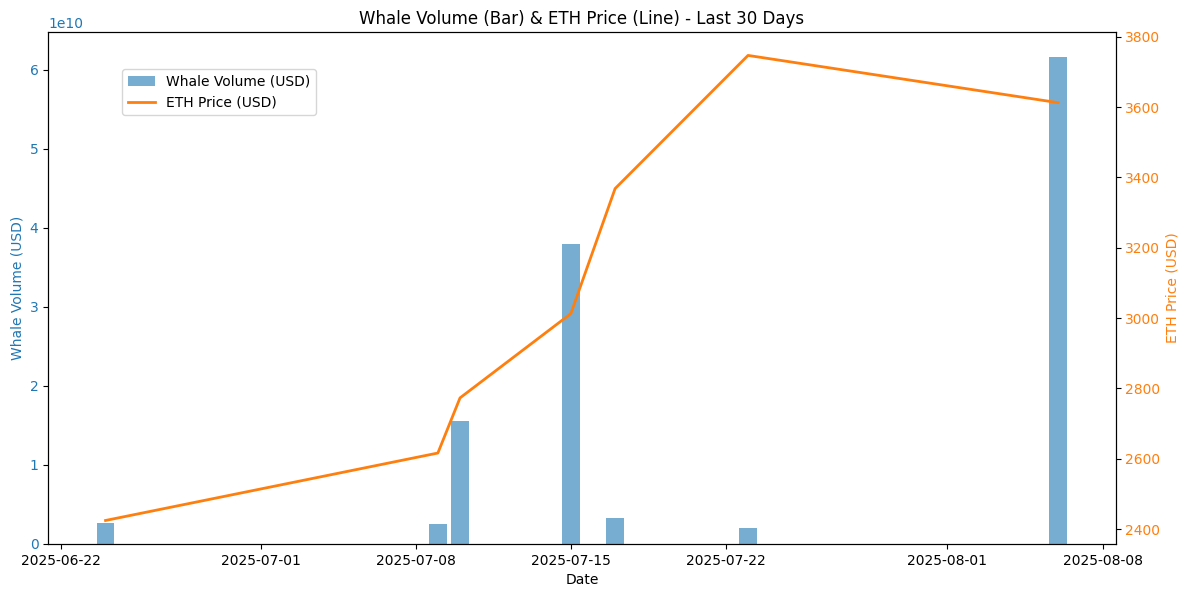

In [16]:
import matplotlib.pyplot as plt
fig, ax1 = plt.subplots(figsize=(12,6))
ax1.bar(merged_corr['date'], merged_corr['whale_volume_usd'], color='tab:blue', alpha=0.6, label='Whale Volume (USD)')
ax1.set_xlabel('Date')
ax1.set_ylabel('Whale Volume (USD)', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax2 = ax1.twinx()
ax2.plot(merged_corr['date'], merged_corr['price_usd'], color='tab:orange', label='ETH Price (USD)', linewidth=2)
ax2.set_ylabel('ETH Price (USD)', color='tab:orange')
ax2.tick_params(axis='y', labelcolor='tab:orange')
fig.tight_layout()
plt.title('Whale Volume (Bar) & ETH Price (Line) - Last 30 Days')
fig.legend(loc='upper left', bbox_to_anchor=(0.1,0.9))
plt.show()

In [17]:
# ### Correlation Analysis
# Calculate and print the correlation between whale volume and ETH price.
# Remove formatting for correlation calculation
merged_corr = pd.merge(eth_prices, daily_whale_volume, on='date', how='inner')
corr_value = merged_corr['whale_volume_usd'].corr(merged_corr['eth_price'])
print(f"Correlation between whale volume and ETH price (daily, last 30 days): {corr_value:.4f}")

Correlation between whale volume and ETH price (daily, last 30 days): -0.1677


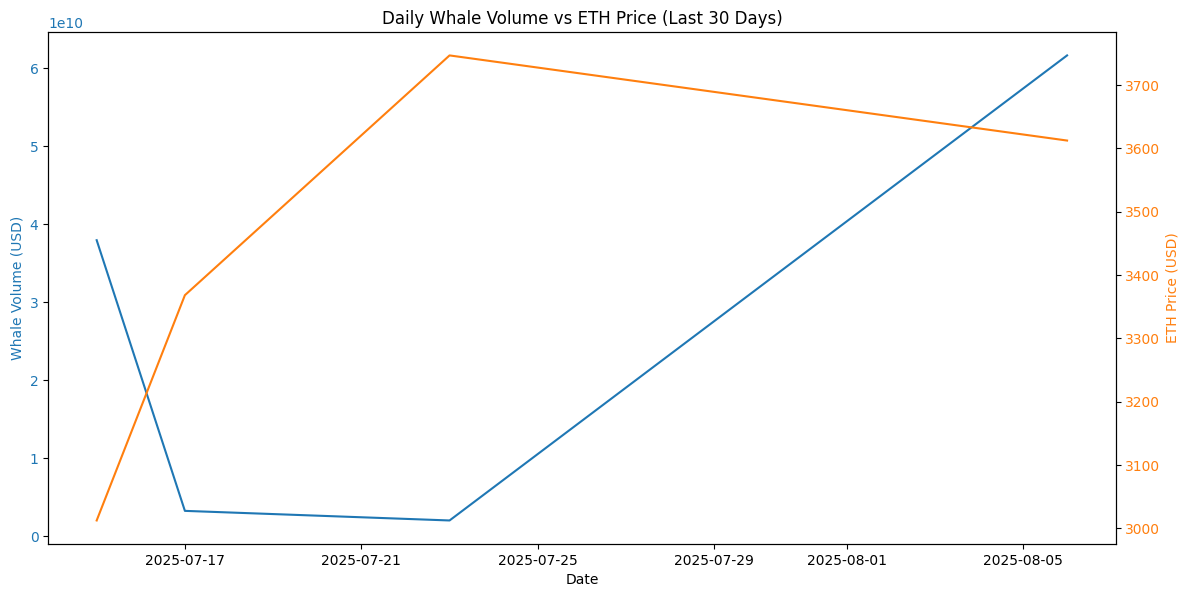

In [18]:
# ### Visualization
# Plot daily whale volume and ETH price with dual y-axes for trend analysis.
import matplotlib.pyplot as plt

# Create plot with dual y-axes
fig, ax1 = plt.subplots(figsize=(12,6))

ax1.set_xlabel('Date')
ax1.set_ylabel('Whale Volume (USD)', color='tab:blue')
ax1.plot(merged_corr['date'], merged_corr['whale_volume_usd'], color='tab:blue', label='Whale Volume (USD)')
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2 = ax1.twinx()
ax2.set_ylabel('ETH Price (USD)', color='tab:orange')
ax2.plot(merged_corr['date'], merged_corr['eth_price'], color='tab:orange', label='ETH Price (USD)')
ax2.tick_params(axis='y', labelcolor='tab:orange')

fig.tight_layout()
plt.title('Daily Whale Volume vs ETH Price (Last 30 Days)')
plt.show()